In [55]:
# ANDREW JOYNER
# 801293231
# HOMEWORK 2

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

# **QUESTION 1**

In [57]:
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/diabetes.csv"
df = pd.read_csv(url)
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [58]:
# separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (768, 8)
Target shape: (768,)


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"\nTraining set class distribution:\n{y_train.value_counts()}")
print(f"\nTest set class distribution:\n{y_test.value_counts()}")

Training set size: 614 samples
Test set size: 154 samples

Training set class distribution:
Outcome
0    400
1    214
Name: count, dtype: int64

Test set class distribution:
Outcome
0    100
1     54
Name: count, dtype: int64


In [60]:
# standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data standardized successfully!")
print(f"Training data mean: {X_train_scaled.mean():.6f}")
print(f"Training data std: {X_train_scaled.std():.6f}")

Data standardized successfully!
Training data mean: -0.000000
Training data std: 1.000000


In [61]:
# train logistic regression
model = LogisticRegression(max_iter=1000, random_state=42, verbose=1, solver='lbfgs')
model.fit(X_train_scaled, y_train)

print("\nModel training completed!")

y_pred = model.predict(X_test_scaled)


Model training completed!


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


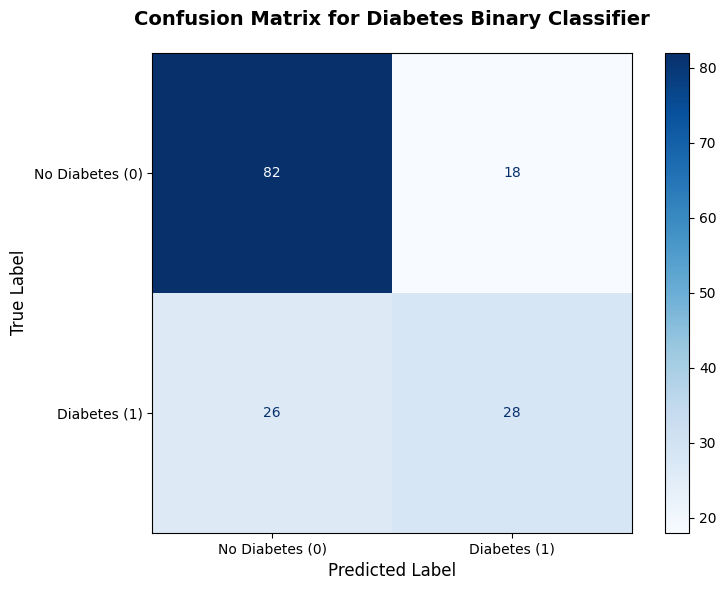


Confusion Matrix Analysis:
True Negatives (TN):   82 - Correctly predicted No Diabetes
False Positives (FP):  18 - Incorrectly predicted Diabetes
False Negatives (FN):  26 - Incorrectly predicted No Diabetes
True Positives (TP):   28 - Correctly predicted Diabetes


In [62]:
# calculate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

# create figure
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes (0)', 'Diabetes (1)'])
disp.plot(cmap='Blues', ax=ax, values_format='d')
ax.set_title('Confusion Matrix for Diabetes Binary Classifier', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

# print confusion matrix details
print("\nConfusion Matrix Analysis:")
print("="*60)
print(f"True Negatives (TN):  {cm[0, 0]:3d} - Correctly predicted No Diabetes")
print(f"False Positives (FP): {cm[0, 1]:3d} - Incorrectly predicted Diabetes")
print(f"False Negatives (FN): {cm[1, 0]:3d} - Incorrectly predicted No Diabetes")
print(f"True Positives (TP):  {cm[1, 1]:3d} - Correctly predicted Diabetes")
print("="*60)

In [63]:
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("="*60)
print("MODEL EVALUATION RESULTS")
print("="*60)
print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"F1 Score:  {f1:.4f} ({f1*100:.2f}%)")
print("="*60)

# additional interpretation
print("\nInterpretation:")
print(f"- Out of 100 predictions, approximately {int(accuracy*100)} are correct")
print(f"- Out of 100 positive predictions, approximately {int(precision*100)} are true positives")
print(f"- Out of 100 actual positive cases, approximately {int(recall*100)} are correctly identified")

MODEL EVALUATION RESULTS
Accuracy:  0.7143 (71.43%)
Precision: 0.6087 (60.87%)
Recall:    0.5185 (51.85%)
F1 Score:  0.5600 (56.00%)

Interpretation:
- Out of 100 predictions, approximately 71 are correct
- Out of 100 positive predictions, approximately 60 are true positives
- Out of 100 actual positive cases, approximately 51 are correctly identified


In [64]:
# make predictions
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42)
sgd_model.fit(X_train_scaled, y_train)
y_pred = sgd_model.predict(X_test_scaled)

print("Predictions completed!")
print(f"Sample predictions (first 10): {y_pred[:10]}")
print(f"Actual values (first 10): {y_test.values[:10]}")

Predictions completed!
Sample predictions (first 10): [0 0 1 0 0 0 0 1 0 1]
Actual values (first 10): [0 0 0 1 0 0 1 1 0 0]


Iteration 20: Train Loss = 6.2097, Train Acc = 0.7134, Test Acc = 0.6688
Iteration 40: Train Loss = 6.0361, Train Acc = 0.7150, Test Acc = 0.6429
Iteration 60: Train Loss = 8.3373, Train Acc = 0.6466, Test Acc = 0.6169
Iteration 80: Train Loss = 5.7594, Train Acc = 0.7231, Test Acc = 0.6494
Iteration 100: Train Loss = 4.8068, Train Acc = 0.7134, Test Acc = 0.6558

Training completed!


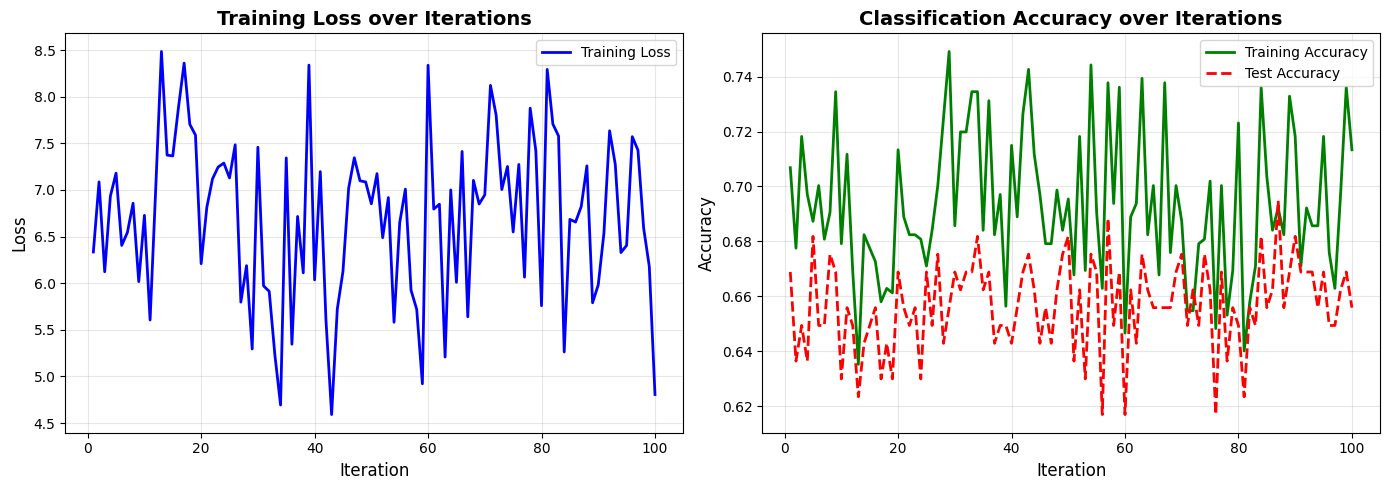

Final Training Accuracy: 0.7134
Final Test Accuracy: 0.6558


In [65]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score
import numpy as np

sgd_model = SGDClassifier(loss='log_loss', max_iter=1, warm_start=True, random_state=42, learning_rate='optimal', tol=None)

iterations = []
train_losses = []
train_accuracies = []
test_accuracies = []

n_iterations = 100

for i in range(n_iterations):
    sgd_model.fit(X_train_scaled, y_train)

    y_train_pred = sgd_model.predict(X_train_scaled)
    y_test_pred = sgd_model.predict(X_test_scaled)

    y_train_proba = sgd_model.predict_proba(X_train_scaled)
    train_loss = log_loss(y_train, y_train_proba)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    iterations.append(i + 1)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    if (i + 1) % 20 == 0:
        print(f"Iteration {i+1}: Train Loss = {train_loss:.4f}, Train Acc = {train_acc:.4f}, Test Acc = {test_acc:.4f}")

print("\nTraining completed!")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# plot training loss
ax1.plot(iterations, train_losses, 'b-', linewidth=2, label='Training Loss')
ax1.set_xlabel('Iteration', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_title('Training Loss over Iterations', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# plot training and test accuracy
ax2.plot(iterations, train_accuracies, 'g-', linewidth=2, label='Training Accuracy')
ax2.plot(iterations, test_accuracies, 'r--', linewidth=2, label='Test Accuracy')
ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.set_title('Classification Accuracy over Iterations', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

print(f"Final Training Accuracy: {train_accuracies[-1]:.4f}")
print(f"Final Test Accuracy: {test_accuracies[-1]:.4f}")

In [66]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

sgd_model = SGDClassifier(loss='log_loss', max_iter=1, warm_start=True, random_state=42,
                          learning_rate='optimal', tol=None)

iterations = []
train_losses = []
train_accuracies = []
test_accuracies = []

n_iterations = 100

for i in range(n_iterations):
    sgd_model.fit(X_train_scaled, y_train)

    y_train_pred = sgd_model.predict(X_train_scaled)
    y_test_pred = sgd_model.predict(X_test_scaled)


    y_train_proba = sgd_model.predict_proba(X_train_scaled)
    train_loss = log_loss(y_train, y_train_proba)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)


    iterations.append(i + 1)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    if (i + 1) % 20 == 0:
        print(f"Iteration {i+1}: Train Loss = {train_loss:.4f}, Train Acc = {train_acc:.4f}, Test Acc = {test_acc:.4f}")

print("\nTraining completed!")

Iteration 20: Train Loss = 6.2097, Train Acc = 0.7134, Test Acc = 0.6688
Iteration 40: Train Loss = 6.0361, Train Acc = 0.7150, Test Acc = 0.6429
Iteration 60: Train Loss = 8.3373, Train Acc = 0.6466, Test Acc = 0.6169
Iteration 80: Train Loss = 5.7594, Train Acc = 0.7231, Test Acc = 0.6494
Iteration 100: Train Loss = 4.8068, Train Acc = 0.7134, Test Acc = 0.6558

Training completed!


# **QUESTION 2**

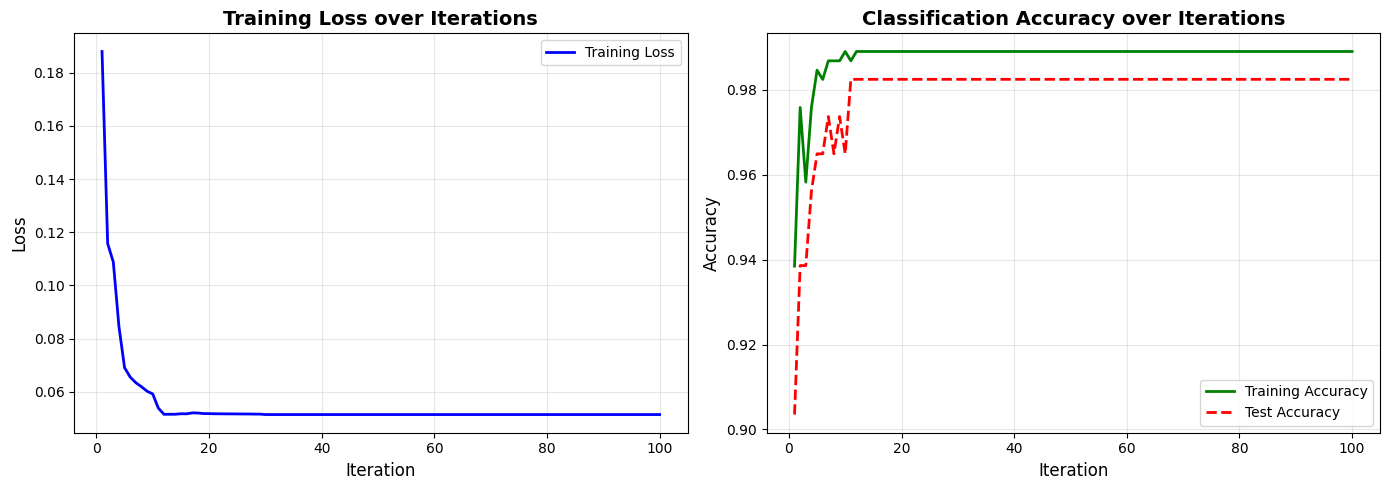

MODEL EVALUATION RESULTS
Accuracy:  0.9825 (98.25%)
Precision: 0.9861 (98.61%)
Recall:    0.9861 (98.61%)
F1 Score:  0.9861 (98.61%)


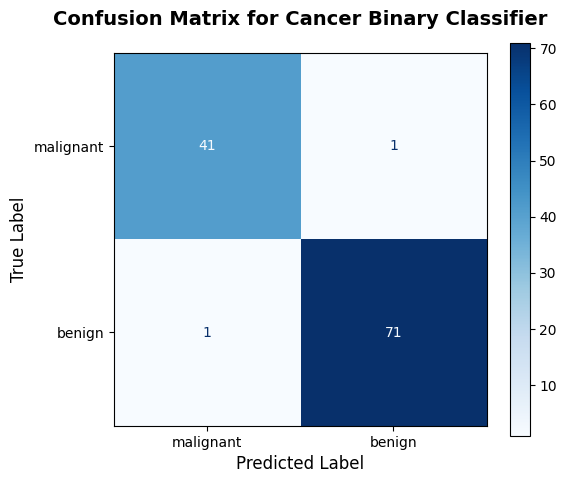

In [67]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# load data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# standardise
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression(max_iter=1, warm_start=True, solver='lbfgs', random_state=42)
n_iterations = 100
train_losses = []
train_accuracies = []
test_accuracies = []

for i in range(n_iterations):
    model.fit(X_train_scaled, y_train)

    y_train_proba = model.predict_proba(X_train_scaled)

    loss = -np.mean(y_train * np.log(y_train_proba[:,1] + 1e-15) + (1 - y_train) * np.log(1 - y_train_proba[:,1] + 1e-15))
    train_losses.append(loss)

    train_acc = accuracy_score(y_train, model.predict(X_train_scaled))
    test_acc = accuracy_score(y_test, model.predict(X_test_scaled))
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# plot loss
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(range(1, n_iterations+1), train_losses, 'b-', linewidth=2, label='Training Loss')
ax1.set_xlabel('Iteration', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_title('Training Loss over Iterations', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

ax2.plot(range(1, n_iterations+1), train_accuracies, 'g-', linewidth=2, label='Training Accuracy')
ax2.plot(range(1, n_iterations+1), test_accuracies, 'r--', linewidth=2, label='Test Accuracy')
ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.set_title('Classification Accuracy over Iterations', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()
plt.tight_layout()
plt.show()

# final eval
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("MODEL EVALUATION RESULTS")
print("="*60)
print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"F1 Score:  {f1:.4f} ({f1*100:.2f}%)")
print("="*60)

# confusin matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer.target_names)
disp.plot(cmap='Blues', ax=ax, values_format='d')
ax.set_title('Confusion Matrix for Cancer Binary Classifier', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

## **Question 2 PART B**

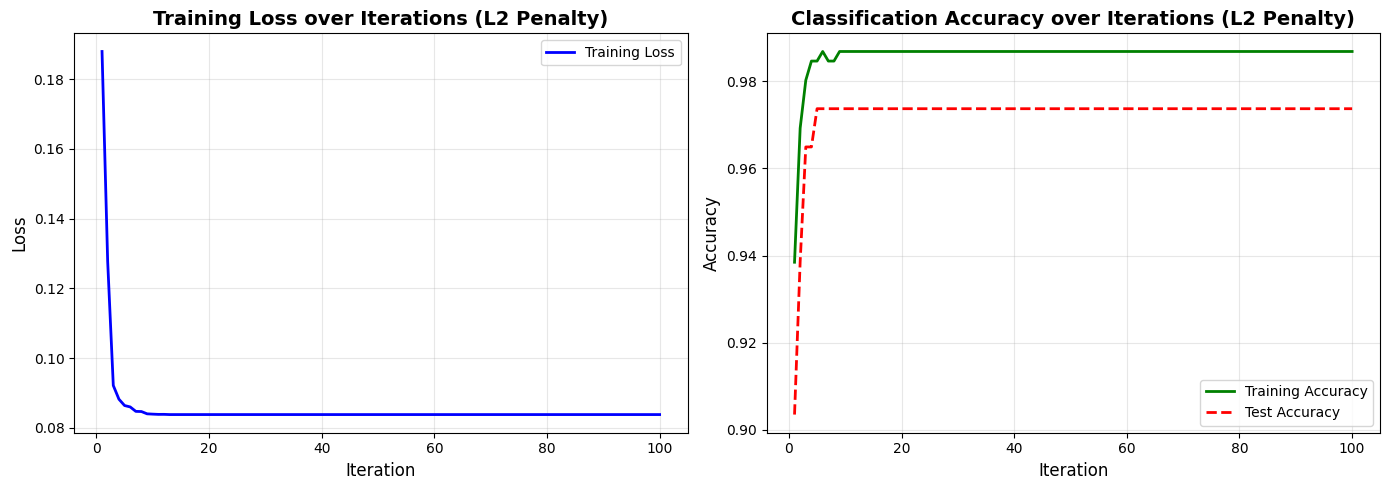

MODEL EVALUATION RESULTS WITH L2 PENALTY
Accuracy:  0.9737 (97.37%)
Precision: 0.9726 (97.26%)
Recall:    0.9861 (98.61%)
F1 Score:  0.9793 (97.93%)


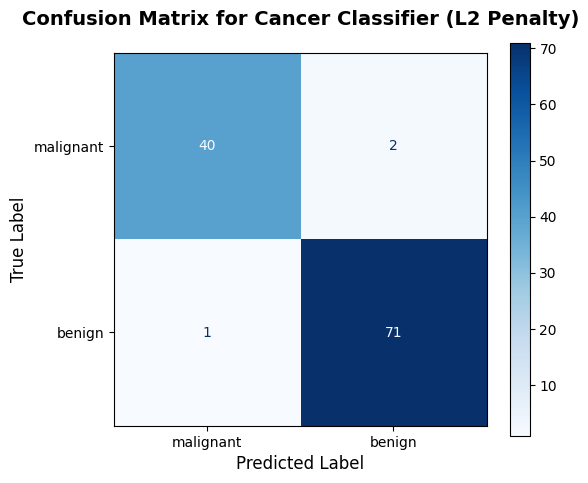

In [68]:
# logistic regression with L2 regularization (weight penalty)
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# load data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression(max_iter=1, warm_start=True, solver='lbfgs', random_state=42, penalty='l2', C=0.1)
n_iterations = 100
train_losses = []
train_accuracies = []
test_accuracies = []

for i in range(n_iterations):
    model.fit(X_train_scaled, y_train)
    y_train_proba = model.predict_proba(X_train_scaled)
    loss = -np.mean(y_train * np.log(y_train_proba[:,1] + 1e-15) + (1 - y_train) * np.log(1 - y_train_proba[:,1] + 1e-15))
    train_losses.append(loss)
    train_acc = accuracy_score(y_train, model.predict(X_train_scaled))
    test_acc = accuracy_score(y_test, model.predict(X_test_scaled))
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# plot loss
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(range(1, n_iterations+1), train_losses, 'b-', linewidth=2, label='Training Loss')
ax1.set_xlabel('Iteration', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_title('Training Loss over Iterations (L2 Penalty)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

ax2.plot(range(1, n_iterations+1), train_accuracies, 'g-', linewidth=2, label='Training Accuracy')
ax2.plot(range(1, n_iterations+1), test_accuracies, 'r--', linewidth=2, label='Test Accuracy')
ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.set_title('Classification Accuracy over Iterations (L2 Penalty)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()
plt.tight_layout()
plt.show()

# final eval
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("MODEL EVALUATION RESULTS WITH L2 PENALTY")
print("="*60)
print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"F1 Score:  {f1:.4f} ({f1*100:.2f}%)")
print("="*60)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer.target_names)
disp.plot(cmap='Blues', ax=ax, values_format='d')
ax.set_title('Confusion Matrix for Cancer Classifier (L2 Penalty)', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()